In [2]:
#pip install yfinance
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [3]:
import yfinance as yf

symbol = 'EURUSD=X'
eurusd_df = yf.download(tickers=symbol) # no period brings all
eurusd_df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0
2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0
2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0
2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0
2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0


In [4]:
eurusd_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5188 entries, 2003-12-01 to 2023-11-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5188 non-null   float64
 1   High       5188 non-null   float64
 2   Low        5188 non-null   float64
 3   Close      5188 non-null   float64
 4   Adj Close  5188 non-null   float64
 5   Volume     5188 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 283.7 KB


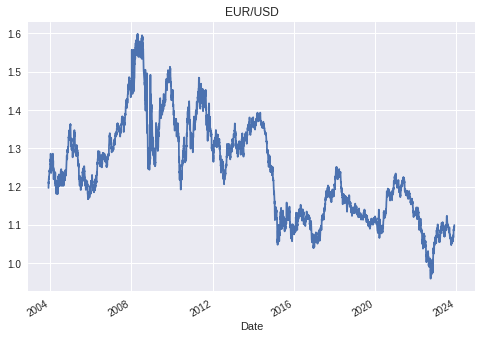

In [5]:
eurusd_df["Close"].plot(title="EUR/USD")
plt.show()

In [6]:
# creating a new column "Returns"
# https://www.geeksforgeeks.org/python-pandas-dataframe-shift/
# 
# every day, period=1, divide with inmediatly before
eurusd_df["Returns"] = np.log(eurusd_df["Close"].div(eurusd_df["Close"].shift(1)))
eurusd_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5188 entries, 2003-12-01 to 2023-11-28
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5188 non-null   float64
 1   High       5188 non-null   float64
 2   Low        5188 non-null   float64
 3   Close      5188 non-null   float64
 4   Adj Close  5188 non-null   float64
 5   Volume     5188 non-null   int64  
 6   Returns    5187 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 324.2 KB


In [7]:
eurusd_df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0,NaN
2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0,0.010307
2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0,0.002809
2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0,-0.003473
2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0,0.008736


Simple Buy and Hold Strategy

In [8]:
eurusd_df.dropna(inplace=True)
eurusd_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5187 entries, 2003-12-02 to 2023-11-28
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5187 non-null   float64
 1   High       5187 non-null   float64
 2   Low        5187 non-null   float64
 3   Close      5187 non-null   float64
 4   Adj Close  5187 non-null   float64
 5   Volume     5187 non-null   int64  
 6   Returns    5187 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 324.2 KB


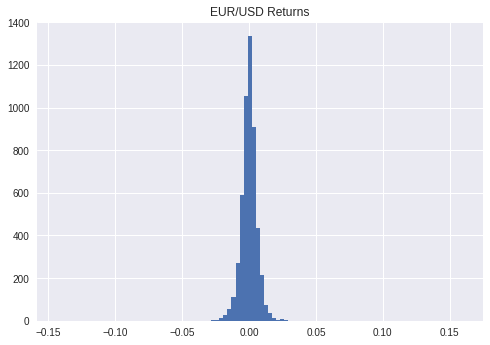

In [9]:
# by ploting distributions we see that most of the time EUR/DOL are very much a like values
eurusd_df.Returns.hist(bins=100)
plt.title("EUR/USD Returns")
plt.show()

In [10]:
# by seeng a negative value it means that Dollar is depreciated and EURO is gaining value in porcentage
eurusd_df.Returns.sum()

-0.08454152915491714

In [11]:
# the value us around 8 cents in change of buying a DOLLAR with EURO
np.exp(eurusd_df.Returns.sum())

0.9189334920530419

In [12]:
eurusd_df.Close[-1]/eurusd_df.Close[0]

0.9095107005081468

In [13]:
eurusd_df.Returns.cumsum().apply(np.exp)

Date
2003-12-02    1.010360
2003-12-03    1.013202
2003-12-04    1.009689
2003-12-05    1.018549
2003-12-08    1.021312
                ...   
2023-11-22    0.912512
2023-11-23    0.910227
2023-11-24    0.911517
2023-11-27    0.914369
2023-11-28    0.918933
Name: Returns, Length: 5187, dtype: float64

In [14]:
eurusd_df["Creturns"] = eurusd_df.Returns.cumsum().apply(np.exp)
eurusd_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5187 entries, 2003-12-02 to 2023-11-28
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5187 non-null   float64
 1   High       5187 non-null   float64
 2   Low        5187 non-null   float64
 3   Close      5187 non-null   float64
 4   Adj Close  5187 non-null   float64
 5   Volume     5187 non-null   int64  
 6   Returns    5187 non-null   float64
 7   Creturns   5187 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 364.7 KB


In [15]:
eurusd_df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Creturns
Date,,,,,,,,
2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0,0.010307,1.010360
2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0,0.002809,1.013202
2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0,-0.003473,1.009689
2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0,0.008736,1.018549
2003-12-08,1.216797,1.224005,1.215407,1.222001,1.222001,0,0.002709,1.021312


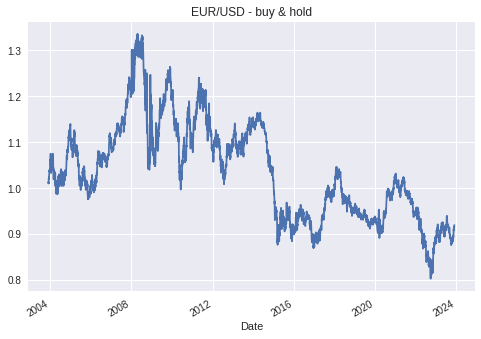

In [16]:
eurusd_df["Creturns"].plot(title="EUR/USD - buy & hold")
plt.show()

In [17]:
# absolute performance in money, Dollar is 0.91 of Euro
eurusd_df.Creturns.iloc[-1]

0.9189334920530415

In [18]:
# absolut performance in percentage, Dollar lost 8.56% with Euro
eurusd_df.Returns.sum()

-0.08454152915491714

In [19]:
eurusd_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Returns,Creturns
count,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.0,5187.000000,5187.000000
mean,1.237366,1.241993,1.232323,1.237392,1.237392,0.0,-0.000016,1.034175
std,0.126734,0.127454,0.127091,0.126727,0.126727,0.0,0.007180,0.105915
min,0.959619,0.967006,0.072902,0.959619,0.959619,0.0,-0.143324,0.802021
25%,1.127561,1.131508,1.123482,1.127650,1.127650,0.0,-0.003253,0.942456
50%,1.225595,1.230618,1.220003,1.225640,1.225640,0.0,0.000012,1.024353
75%,1.331062,1.336005,1.325205,1.331221,1.331221,0.0,0.003269,1.112595
max,1.598184,1.602821,1.587402,1.598798,1.598798,0.0,0.159632,1.336227


In [20]:
# annualized metrics
# means in percentage yearly
eurusd_df.Returns.mean()*252

-0.004107280768659942

In [21]:
# annual risk of investment
eurusd_df.Returns.std()*np.sqrt(252)

0.11397252798335986

In [22]:
eurusd_df["Cummax"] = eurusd_df.Creturns.cummax()
eurusd_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5187 entries, 2003-12-02 to 2023-11-28
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5187 non-null   float64
 1   High       5187 non-null   float64
 2   Low        5187 non-null   float64
 3   Close      5187 non-null   float64
 4   Adj Close  5187 non-null   float64
 5   Volume     5187 non-null   int64  
 6   Returns    5187 non-null   float64
 7   Creturns   5187 non-null   float64
 8   Cummax     5187 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 405.2 KB


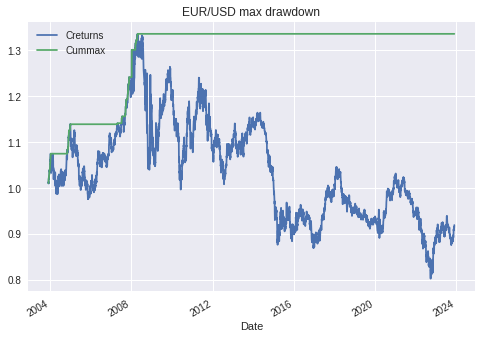

In [23]:
eurusd_df[["Creturns", "Cummax"]].dropna().plot(title="EUR/USD max drawdown")
plt.show()

In [24]:
drawdown = eurusd_df["Cummax"] - eurusd_df["Creturns"]
drawdown.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 5187 entries, 2003-12-02 to 2023-11-28
Series name: None
Non-Null Count  Dtype  
--------------  -----  
5187 non-null   float64
dtypes: float64(1)
memory usage: 81.0 KB


In [25]:
drawdown.head()

Date
2003-12-02    0.000000
2003-12-03    0.000000
2003-12-04    0.003513
2003-12-05    0.000000
2003-12-08    0.000000
dtype: float64

In [26]:
drawdown.describe()

count    5187.000000
mean        0.259118
std         0.144980
min         0.000000
25%         0.136150
50%         0.266524
75%         0.393771
max         0.534206
dtype: float64

Crossover Strategy

In [28]:
# interactive plots
import cufflinks as cf

symbol = 'BOLSAA.MX'
bolsaamx_df = yf.download(tickers=symbol) # no period brings all
bolsaamx_df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-06-13,16.490000,20.000000,16.400000,16.490000,8.713953,125989800
2008-06-16,16.360001,16.980000,16.200001,16.360001,8.645256,15919100
2008-06-17,15.510000,16.440001,15.400000,15.510000,8.196084,18128400
2008-06-18,15.540000,15.700000,15.100000,15.540000,8.211938,7887700
2008-06-19,15.540000,15.880000,15.220000,15.540000,8.211938,6927200


In [30]:
qf = cf.QuantFig(df=bolsaamx_df.loc["2022" : "2023"])

In [35]:
# strategy in short sma = 20 periods
# long sma = 100 periods
# periods growing we have les detail in lectures
cf.set_config_file(offline = True)
qf.add_sma(periods=20)
qf.add_sma(periods=100)

In [36]:
# crossover means that some times SMA(100) is up and SMA(20) is down and viceversa, normal is former, crossover is SMA(20) up ad SMA(100) down
qf.iplot(title="Bolsa MX", name="BolsaMX")

In [37]:
eurusd_df.info()
sma_s = 50
sma_l = 200

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5187 entries, 2003-12-02 to 2023-11-28
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5187 non-null   float64
 1   High       5187 non-null   float64
 2   Low        5187 non-null   float64
 3   Close      5187 non-null   float64
 4   Adj Close  5187 non-null   float64
 5   Volume     5187 non-null   int64  
 6   Returns    5187 non-null   float64
 7   Creturns   5187 non-null   float64
 8   Cummax     5187 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 405.2 KB


In [38]:
# https://www.geeksforgeeks.org/python-pandas-dataframe-rolling/
# we take info of every 50 consecutive places
eurusd_df.Close.rolling(50)

Rolling [window=50,center=False,axis=0,method=single]

In [39]:
eurusd_df["SMA_S"] = eurusd_df.Close.rolling(sma_s).mean()
eurusd_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Returns,Creturns,Cummax,SMA_S
count,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.0,5187.000000,5187.000000,5187.000000,5138.000000
mean,1.237366,1.241993,1.232323,1.237392,1.237392,0.0,-0.000016,1.034175,1.293293,1.238163
std,0.126734,0.127454,0.127091,0.126727,0.126727,0.0,0.007180,0.105915,0.085468,0.125008
min,0.959619,0.967006,0.072902,0.959619,0.959619,0.0,-0.143324,0.802021,1.010360,0.987973
25%,1.127561,1.131508,1.123482,1.127650,1.127650,0.0,-0.003253,0.942456,1.336227,1.124385
50%,1.225595,1.230618,1.220003,1.225640,1.225640,0.0,0.000012,1.024353,1.336227,1.224016
75%,1.331062,1.336005,1.325205,1.331221,1.331221,0.0,0.003269,1.112595,1.336227,1.327613
max,1.598184,1.602821,1.587402,1.598798,1.598798,0.0,0.159632,1.336227,1.336227,1.567162


In [40]:
eurusd_df["SMA_L"] = eurusd_df.Close.rolling(sma_l).mean()
eurusd_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Returns,Creturns,Cummax,SMA_S,SMA_L
count,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.0,5187.000000,5187.000000,5187.000000,5138.000000,4988.000000
mean,1.237366,1.241993,1.232323,1.237392,1.237392,0.0,-0.000016,1.034175,1.293293,1.238163,1.240613
std,0.126734,0.127454,0.127091,0.126727,0.126727,0.0,0.007180,0.105915,0.085468,0.125008,0.119502
min,0.959619,0.967006,0.072902,0.959619,0.959619,0.0,-0.143324,0.802021,1.010360,0.987973,1.031059
25%,1.127561,1.131508,1.123482,1.127650,1.127650,0.0,-0.003253,0.942456,1.336227,1.124385,1.127436
50%,1.225595,1.230618,1.220003,1.225640,1.225640,0.0,0.000012,1.024353,1.336227,1.224016,1.231290
75%,1.331062,1.336005,1.325205,1.331221,1.331221,0.0,0.003269,1.112595,1.336227,1.327613,1.336205
max,1.598184,1.602821,1.587402,1.598798,1.598798,0.0,0.159632,1.336227,1.336227,1.567162,1.519657


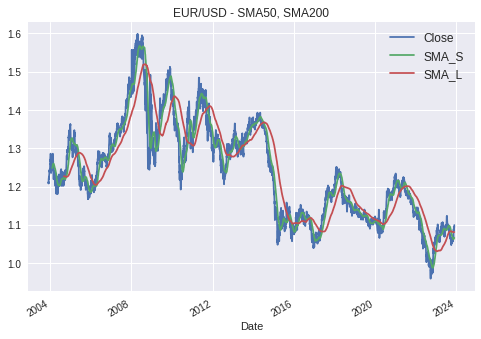

In [43]:
eurusd_df[["Close", "SMA_S", "SMA_L"]].plot(title="EUR/USD - SMA{}, SMA{}".format(sma_s, sma_l))
plt.legend(fontsize=12)
plt.show()

In [44]:
qf = cf.QuantFig(df=bolsaamx_df.loc["2023" :])

In [45]:
qf.iplot(title="Bolsa-MX-2023", name="BolsaMX23")

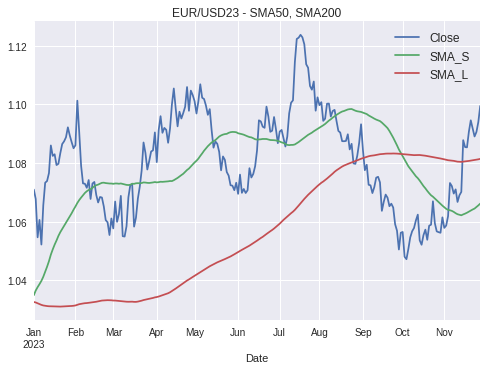

In [46]:
eurusd_df[["Close", "SMA_S", "SMA_L"]].loc["2023"].plot(title="EUR/USD23 - SMA{}, SMA{}".format(sma_s, sma_l))
plt.legend(fontsize=12)
plt.show()

In [47]:
# creating position column to be short or long
# 1 is sell short, -1 is buy long
eurusd_df["Position"] = np.where(eurusd_df["SMA_S"] > eurusd_df["SMA_L"], 1, -1)
eurusd_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Returns,Creturns,Cummax,SMA_S,SMA_L,Position
count,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.0,5187.000000,5187.000000,5187.000000,5138.000000,4988.000000,5187.000000
mean,1.237366,1.241993,1.232323,1.237392,1.237392,0.0,-0.000016,1.034175,1.293293,1.238163,1.240613,-0.022942
std,0.126734,0.127454,0.127091,0.126727,0.126727,0.0,0.007180,0.105915,0.085468,0.125008,0.119502,0.999833
min,0.959619,0.967006,0.072902,0.959619,0.959619,0.0,-0.143324,0.802021,1.010360,0.987973,1.031059,-1.000000
25%,1.127561,1.131508,1.123482,1.127650,1.127650,0.0,-0.003253,0.942456,1.336227,1.124385,1.127436,-1.000000
50%,1.225595,1.230618,1.220003,1.225640,1.225640,0.0,0.000012,1.024353,1.336227,1.224016,1.231290,-1.000000
75%,1.331062,1.336005,1.325205,1.331221,1.331221,0.0,0.003269,1.112595,1.336227,1.327613,1.336205,1.000000
max,1.598184,1.602821,1.587402,1.598798,1.598798,0.0,0.159632,1.336227,1.336227,1.567162,1.519657,1.000000


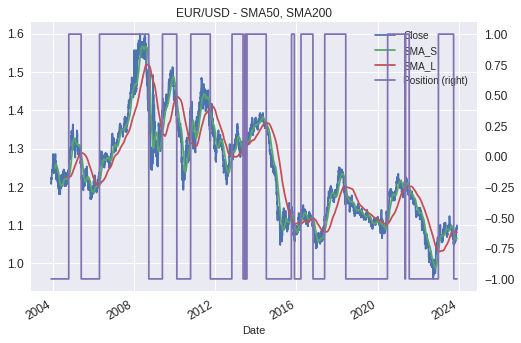

In [52]:
# 1 is sell short, -1 is buy long
eurusd_df[["Close", "SMA_S", "SMA_L", "Position"]].plot(secondary_y="Position", title="EUR/USD - SMA{}, SMA{}".format(sma_s, sma_l), fontsize=12)
plt.show()

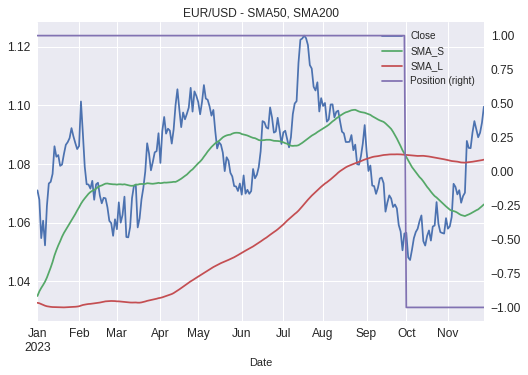

In [57]:
# 1 is sell short, -1 is buy long
eurusd_df.loc["2023", ["Close", "SMA_S", "SMA_L", "Position"]].plot(secondary_y="Position", title="EUR/USD - SMA{}, SMA{}".format(sma_s, sma_l), fontsize=12)
plt.show()

Optimal Strategy

In [61]:
# https://www.forextraders.com/forex-education/forex-indicators/simple-moving-average-strategy/
# https://trendspider.com/learning-center/what-is-the-sma-indicator-simple-moving-average/
def run_strategy(SMA):
    data = eurusd_df.copy()
    data["Returns"] = np.log(data.Close.div(data.Close.shift(1)))
    data["SMA_S"] = data.Close.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.Close.rolling(int(SMA[1])).mean()
    data.dropna(inplace=True)
    
    data["Position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["Strategy"] = data.Position.shift(1) * data["Returns"]
    data.dropna(inplace=True)
    
    return data[["Returns", "Strategy"]].sum().apply(np.exp)

In [62]:
# periods mean time
run_strategy((50, 200))

Returns     0.911248
Strategy    1.354307
dtype: float64

In [63]:
run_strategy((10, 50))

Returns     0.866157
Strategy    1.065187
dtype: float64

In [64]:
run_strategy((22, 252))

Returns     0.849104
Strategy    1.322713
dtype: float64

In [65]:
def run_strategy2(SMA):
    data = eurusd_df.copy()
    data["Returns"] = np.log(data.Close.div(data.Close.shift(1)))
    data["SMA_S"] = data.Close.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.Close.rolling(int(SMA[1])).mean()
    data.dropna(inplace=True)
    
    data["Position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["Strategy"] = data.Position.shift(1) * data["Returns"]
    data.dropna(inplace=True)
    
    return -data[["Returns", "Strategy"]].sum().apply(np.exp)[-1] # maximize absolute performance

In [69]:
from scipy.optimize import brute
# we will have the arguments to work with run strategy function
rranges = (slice(10, 50, 1), slice(100, 252, 1))
print(rranges)
brute_strats = brute(run_strategy2, rranges)
print(brute_strats)

(slice(10, 50, 1), slice(100, 252, 1))
[ 29. 160.]


In [71]:
# we won 2.7
run_strategy((29, 160))

Returns     0.886124
Strategy    2.740346
dtype: float64